# Lab 2 - Intro to Curve Fitting (Scipy/Numpy) and Plotting (Matplotlib)

##  The Photoelectric Effect and Projectile Motion
------------------------------------------------------------------------------------------------

### GitHub:

* Fork the Lab repository to your personal GitHub page.
* Sign into GitHub desktop (using options in the gearwheel) - open the Git Bash shell
* Clone/download the repository to your own directory
* Make a new branch, call it Version-0, this is where you will do your work - I am just learning how important this is!!!
* Save your work to the local machine regularly.
* Commit your work on this branch to GitHub regularly - you don't have to wait until the end of class.
* Remember to make additional branches (Version-1 and Version-2) following each pull request (see below).

### Grading: 
Recall we will be doing the cyclic grading cycle for this assignment.  See the complete syllabus - posted on Moodle - some detailed notes on grading and correcting your work.

Do your work in this file, so it is easy for me to find/grade.  However, there are good reasons to use multiple files in traditional coding projects, so if you have a good reason to want to make a new file, please talk to me about how to make that work.

#### Version-0: 
Before you leave lab today, commit your changes to GitHub, and open a pull request, comparing your forked Version-0 branch back to my original repository.  That's all.

#### Version-1: 
By Monday 9:15am, clean up any unfinished details.  
   * Every code should be well documented with comments.
   * Every graph should be well labeled.  If there is more than one data set or curve, add a legend.
   * Describe each graph with a short paragraph.  What is data plotted, why is it interesting, what model fits that data, is this the model you expect?  Give a written scientific description in complete sentences.
   * Open a pull request on GitHub comparing your forked Version-1 branch back to my original repository.

#### Version-2*: 
After class on Monday, I will post my solution.  
   * Compare our solutions, and look for places you could improve your work 
     * Are your calculations correct?
     * Did you understand (and describe) the physics correctly? 
     * Did you forget anything?
   * Make improvements and comments about your changes.  

\*I called this the Final Version in the syllabus.   

In [12]:
#how to load in plotting to a Jupyter Notebook
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#A note on functions and array arithmetic - 
#several of you have noticed problems using the math module functions on numpy arrays.
#To avoid this problem, use the numpy versions of the functions.  
#For example:
import math
x=math.pi
print(math.sin(x))  #works great - notice what you get - what should you get ? (this is a preview for Ch 4)

x_array = math.pi*np.ones(4) #works fine
print(x_array)                #works fine
#print(math.sin(x_array))     #error
print(np.sin(x_array))        #works fine

## Part 1: Fitting Millikan's Data w/ Least Squares Method 

Discuss your algorithm with your lab partner.  Since you'll be writing your own code today, you are welcome to disagree on the details.  On your own computer, code it up, following my suggestions from the pre-lab.  As you produce results, use markdown cells to present and describe your work.  *For example add a markdown cell to: describe the plotted data, comment on how good the fit appears, and how it relates to Einstein's model, the percent difference, etc.*

### Your solution to Part 1:
------------------------------------------------------------------------------------------------------------------

In [ ]:
#scratch paper
millikanData= loadtxt("millikan.txt",float)
x=array([1,2,3,4,5,6],float) #seperates data into two arrays
y=array([1,2,3,4,5,6],float)

def Exy(x,y):
    total=0
    for n in range(x.size):
        f=total+(x[n]*y[n])
        total=f
    return (1/x.size)*total 

print(Exy(x,y))

In [ ]:
from numpy import loadtxt,array
import numpy as np
import matplotlib.pyplot as plt
from pylab import plot, show
millikanData= loadtxt("millikan.txt",float)
x=millikanData[:,0] #seperates data into two arrays
y=millikanData[:,1]

print("millikan data")
print("------------------------")
print("------------------------")

# code fore least squares fit
def Ex(x):#how to get Ex
    total= sum(x) 
    return (1/x.size)*total 

def Ey(x):#how to get Ey
    total= sum(x) 
    return (1/x.size)*total 

def Exx(x):
    total=0
    for n in x:# squaring every value in array x then taking the sum of it
        f=total+ n**2
        total=f
    return (1/x.size)*total    

def Exy(x,y):
    total=0
    for n in range(x.size):# 
        f=total+(x[n]*y[n])
        total=f
    return (1/x.size)*total 



def m(Ex,Exx,Ey,Exy): #function for m value which is the slope
    return (Exy-Ex*Ey)/(Exx-Ex**2)

def c(Ex,Exx,Ey,Exy):#function for y-interecept or c value in least squares fit equation
        return  (Exx*Ey - Ex*Exy)/(Exx - Ex**2)

print(m(Ex(x),Exx(x),Ey(y),Exy(x,y)))
print(c(Ex(x),Exx(x),Ey(y),Exy(x,y)))

slope=m(Ex(x),Exx(x),Ey(y),Exy(x,y)) # sets the value of the slope and y-int functions to these variables
yint=c(Ex(x),Exx(x),Ey(y),Exy(x,y))

print("Fit Coefficients:") # CHANGE: Formatted so it looks cleaner and more readable like in solutions
print("------------------------")
print("slope (m) is:",slope, "V/Hz")
print("y-intercept (c) is:",-yint, "V")
print("------------------------")

#ADDED: connecting physics with what the data is 
electron_charge= 1.6*10**-19 #charge of electron in coulombs
h=slope*electron_charge #to convert from volts to joules
print("calculated plancks constant is:",h, "J*s")
print("the work function phi is:",-yint,"Volts")



y3= x*slope + yint # calcluated expected values using bestfit slope and y-int for x in original data. 


#CHANGED: corrected units and made legend more informative
plt.plot(x,y,".",label="Millikan data") #plot of original data
plt.plot(x,y3, label="Fit to: $V=\frac{h}{e}\nu +\phi$") #plot of trendline
plt.ylabel("Voltage (V)")
plt.xlabel("frequency (Hz)")
plt.title("Photoelectric Effect")
plt.legend(loc='upper left', shadow=True)
show()


#Percent Difference calculations #CHANGED: made plancks consant into a constant insteading of in function
planck=6.626*10**-34
percenterror= (abs((planck)-(h))/h)*100

print("percent error is ",percenterror)

NEW EDITTED ANALYSIS:
Millikans original  data of the photolectric effect is plotted above with a least squares fit method to fit the data. The x axis represents the frequency of the incident light that caused the electron to be ejected off of the material. It is the indpendent variable because it is variable that millikan was able to control and manipulate, and it is the variable that caused the change of the dependent variable, Voltage, which measures the energy of the ejected electron by measuring the voltage required to stop the electron from moving.

From the least squares fit, we can derive the slope which is equivalent to plancks constant. First I converted the units of the slope to J*s and compared it to the the literature value of plancks constant. There is a 1.29% percent error.

The work function can also be derived from the least squares fit line. Newmans text showed that the slope was equivalent to the plancks constant and the y intercept was equivalent to the work function which is the energy needed to remove the electron from the material. Looking at the best fit line, the work function is 1.731 Volts. 


## Part 2: Curve Fitting Tutorial:
Open the Jupyter Notebook CurveFit.ipynb and work through the plots and exercises.  It is a very complete set of information that you should remember to consult for this and other classes.  No need to memorize all of the functions.

You may want to read Part 3 (below) and jump back and forth between the tutorial and applying each step to Millikan's data.

### Submit nothing for this section - However this is a dense document - ask a lot of questions and add comments to the document to help you reuse the functions as you go.  
-----------------------------------------------------------------------------------------------

## Part 3: Fitting Millikan's Data 
Use your new found knowledge from the Curve Fitting Tutorial to fit Millikan's Data with the various fitting routines in the tutorial.  Since it is linear data, it is a great test case to get you started.  Try three cases:
    * polynomial fits
    * linear regression (from the mathematical library scipy)
    * curve fits - even though your data fits a straight line, it is worth trying

To distinguish your new fits from those in part 1, give your new fit coefficients names that match the fit type.  For instance, back in Part 1, I named my coefficients ```m``` and ```b```.  In this section, I named my polynomial fit coefficients ```m_poly```, ```b_poly```.

### Your solution to Part 3:
-----------------------------------------------------------------------------------------------

In [ ]:
# polynomial fit

from numpy import loadtxt,array
from pylab import plot, show
millikanData= loadtxt("millikan.txt",float)#seperates data into two lists
x=millikanData[:,0] 
y=millikanData[:,1]


print(x)
print(y)

fit, cov = np.polyfit(x, y, 1,cov=True)  #use polyfit with first order
cov
a = fit[0] #standard deviation in the fit parameters
b = fit[1]
print("a =",a," b =",b)


plt. plot(x,y,".",label="original data") #plot of original data
plt.ylabel("Voltage Required to stop electron (eV)")
plt.xlabel("frequency (m^-1)")

da = np.sqrt(cov[0,0])
db = np.sqrt(cov[1,1])
print("da = {:.3f}   db = {:.3f}".format(da,db))
plt.plot(x,(a+da)*x + b,"r", label="a+da")# plotting error 
plt.plot(x,(a-da)*x + b,"r",label="a-da")
plt.plot(x,a*x + b + db,"b",label="b+db")
plt.plot(x,a*x + b - db,"b",label="b-db")
plt.title("Photoelectric Effect")
legend = plt.legend(loc='upper left', shadow=True)

show()

The plot above takes the original data and adds a polynomial fit. While this is a different method of adding a trendline, we get the same slope and y-intercept values as the least squares fit method. This method however, adds in our error as well. 

In [ ]:
#linear regression

from scipy.stats import linregress

from numpy import loadtxt,array
from pylab import plot, show
millikanData= loadtxt("millikan.txt",float)#seperates data into two lists
x=millikanData[:,0] 
y=millikanData[:,1]


print("x data points are:",x)
print("y data points are:",y)

#CHANGED: removed the plot because it was not necessary

#plt.plot(x,y,".", label="Original data")
#plt.ylabel("Voltage Required to stop electron (eV)")
#plt.xlabel("frequency (m^-1)")
#plt.title("Photoelectric Effect")
#legend = plt.legend(loc='upper center', shadow=True)

#show()

regresfit = linregress(x,y) #linear regression builtin outputs infor about slope, intercept, rvalue, pvalue...
regresfit

#made reading regressfit more readable like in the solutions
print("slope     =",regresfit[0])
print("intercept =",regresfit[1])
print("rvalue    =",regresfit[2])
print("pvalue    =",regresfit[3])
print("stderr    =",regresfit[4])

Another method is to use a linear regression, It is just as valid as the other two methods because they gave the same slope and intercept values. This builtin outputs the slope, y-int, R-value, pvalue and standard deviation. 

x data points are: [  5.48740000e+14   6.93100000e+14   7.43070000e+14   8.21930000e+14
   9.60740000e+14   1.18400000e+15]
y data points are: [ 0.5309   1.0842   1.2734   1.6598   2.19856  3.10891]


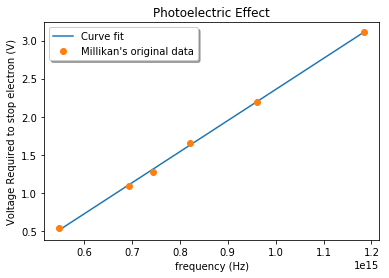

slope and intercept for curve fit is: [  4.08822736e-15  -1.73123580e+00]


In [7]:
#curve fits used for known functions

from scipy.optimize import curve_fit
from numpy import loadtxt,array
from pylab import plot, show
import matplotlib.pyplot as plt

millikanData= loadtxt("millikan.txt",float)#seperates data into two lists
x=millikanData[:,0] 
y=millikanData[:,1]


print("x data points are:",x)
print("y data points are:",y)


def func(x,m,b): #make a general function in the form you want
    return m*x +b

#NOT NECESSARY
#y = func(x,4.0882273585175089e-15, -1.7312358039813545)
#ydata = y * (1.0 + 0.1*np.random.normal(size=len(x))) 

#plt.plot(x,ydata,"k.")

parameters, covariance = curve_fit(func, x, y)
parameters

covariance

yfit = func(x, *parameters) 

#plt.plot(x,ydata,".",label="ydata") 

#plots all of the data on one graph
plt.plot(x,yfit, label= "Curve fit") 
plt.plot(x,y,"o",label="Millikan's original data")
legend = plt.legend(loc='upper left', shadow=True)
plt.ylabel("Voltage Required to stop electron (V)")
plt.xlabel("frequency (Hz)")
plt.title("Photoelectric Effect")
show()

print("slope and intercept for curve fit is:",parameters)



last but not least, a curve fit was used to determine the best fit for the millikan data. since the data represents a known function (a linear one) a general form of the function was made and plotted. 

Text(0.5,0,'frequency (Hz)')

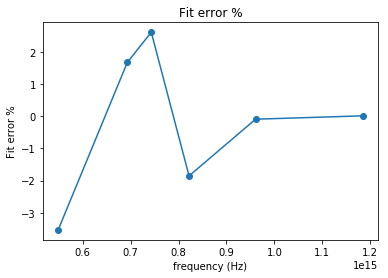

In [40]:
from scipy.optimize import curve_fit
from numpy import loadtxt,array
from pylab import plot, show
import matplotlib.pyplot as plt

millikanData= loadtxt("millikan.txt",float)#seperates data into two lists
x=millikanData[:,0] 
y=millikanData[:,1]

parameters, covariance = curve_fit(func, x, y)
parameters

covariance

yfit = func(x, *parameters) 

plt.plot(x,((yfit-y)/y)*100,"o-")
plt.title("Fit error % of Millikans Data")
plt.title("Fit error %")
plt.ylabel("Fit error %")
plt.xlabel("frequency (Hz)")

Fit error of each data point from the trendline created in above plot. This shows that the error is lower at lower frequencies. 

## Part 4: Fitting Projectile Motion Data

1.  Generate some 1D projectile motion data.  You are encouraged to use the function provided in Weekly Session 2. 

2. Add some "noise" to the data with a random variable. Plot the original function (without noise) and the noisy "data" with the scatter() function.  Use some of the tips/tricks on modifying scatter plots that are linked in Weekly Session 2.
3. Note that you have two plots to make - $x$ vs. $t$ and $v$ vs. $t$. Use this [link](https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py) to learn how to make subplots.

4. Perform a curve fit to your noisy "data" and anaylze the error in the fit (i.e. the difference between the fit result and the original (noiseless) function. Compare the fit parameters to your original parameters using the standard deviation in the fit parameters. How close does the fit get to your original parameters? Repeat the analysis to generate new random data and compare again.

### Your solution to Part 4:
-----------------------------------------------------------------------------------------------

x data points are: [   1.            1.19008264    1.39669421    1.61983471    1.85950413
    2.11570248    2.38842975    2.67768595    2.98347107    3.30578512
    3.6446281     4.            4.37190083    4.76033058    5.16528926
    5.58677686    6.02479339    6.47933884    6.95041322    7.43801653
    7.94214876    8.46280992    9.            9.55371901   10.12396694
   10.7107438    11.31404959   11.9338843    12.57024793   13.2231405
   13.89256198   14.5785124    15.28099174   16.           16.73553719
   17.48760331   18.25619835   19.04132231   19.84297521   20.66115702
   21.49586777   22.34710744   23.21487603   24.09917355   25.
   25.91735537   26.85123967   27.80165289   28.76859504   29.75206612
   30.75206612   31.76859504   32.80165289   33.85123967   34.91735537
   36.           37.09917355   38.21487603   39.34710744   40.49586777
   41.66115702   42.84297521   44.04132231   45.25619835   46.48760331
   47.73553719   49.           50.28099174   51.5785124    52.89256

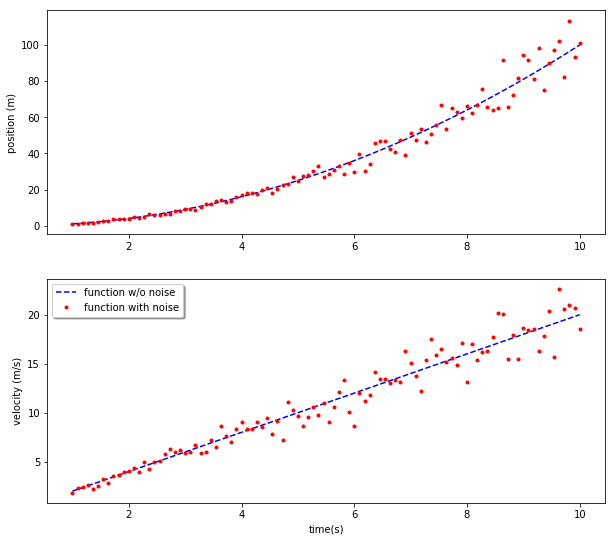

In [15]:

def position(t, a, v_i=0, x_i=0): #function for position and velocity for given time
    x=x_i+v_i*t+0.5*a*t**2
    v=v_i+a*t
    return x,v

t = np.linspace(1,10,100) # time values
x,v= position(t,2) #position and velocity valies
xnoise=x*(1.0 + 0.1*np.random.normal(size=len(t))) #adding noise
vnoise= v*(1.0 + 0.1*np.random.normal(size=len(t)))



from scipy.optimize import curve_fit

#print("x data points are:",x)
#print("y data points are:",y)




plt.figure(figsize=(10, 14)) #ADDED: makes graph more readable
plt.subplot(3, 1, 1) #plots for position
plt.plot(t,x,"b--",label= "function w/o noise")
plt.plot(t,xnoise,"r.",label="function with noise")
plt.ylabel("position (m)")

plt.subplot(3, 1, 2) #plots for velocity
plt.plot(t,v,"b--", label= "function w/o noise")
plt.plot(t,vnoise,"r.",label="function with noise")
plt.ylabel("velocity (m/s)")

plt.xlabel("time(s)")
legend = plt.legend(loc='upper left', shadow=True)

show()

The above graph plots the position and velocity of an object in 1D projectile motion. while it is hard to see, the first set of data describing position does have the characteristic curve of a second degree polynomial and the second set describing velocity is linear. These plots can be seen more clearly in the following plots. 

C:\Users\chand\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[ -1.97300193e-09   3.06642647e-09   2.00000000e+00]
[  1.00000000e+00   2.32495700e-09   2.00000000e+00]


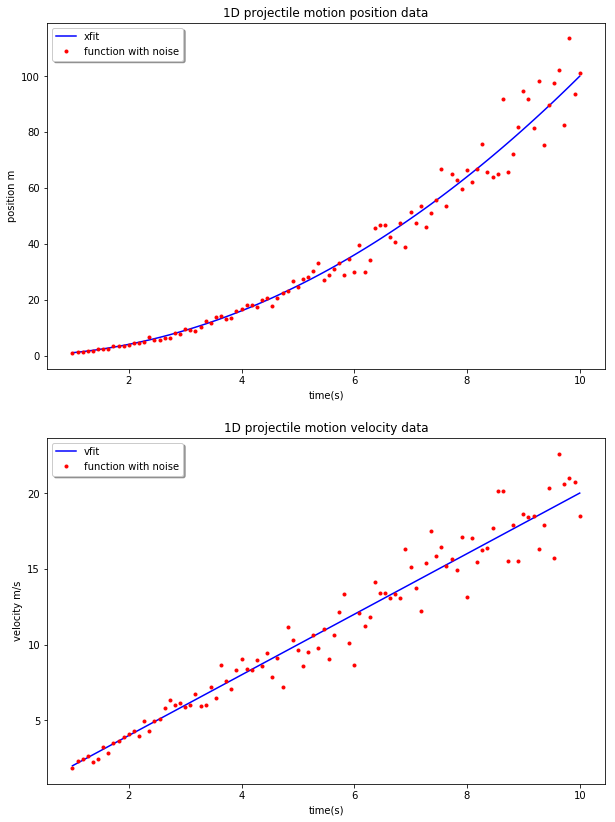

In [34]:
#curve fit for position
##CHANGED: before I had two seperate cells for position and velocity, I combined them into one cell like in solutions
def funcposition(y,a,b,c):
    return  a+b*y+c*0.5*y**2

def funcvelocity(t,a,b,c):
    return  b+c*t


parameters, covariance = curve_fit(funcposition, t, x)
parameters

parameters2, covariance2 = curve_fit(funcvelocity, t, v)
parameters
covariance

xfit = funcposition(t, *parameters) #y fit
print(parameters)
print(parameters2)


vfit = funcvelocity(t, *parameters2) 


#plt.plot(t,ydata,".", label= "data with noise")

plt.figure(figsize=(10, 14)) #ADDED: makes graph more readable
plt.subplot(2, 1, 1) #plots for position
plt.plot(t,xfit, "b", label="xfit") 
plt.plot(t,xnoise,"r.",label="function with noise")
plt.xlabel("time(s)")
plt.ylabel("position m")
plt.title("1D projectile motion position data")
legend = plt.legend(loc='upper left', shadow=True)

plt.subplot(2, 1, 2) #plots for velocity
plt.plot(t,vfit, "b", label="vfit")
plt.plot(t,vnoise,"r.",label="function with noise")
plt.xlabel("time(s)")
plt.ylabel("velocity m/s")
legend = plt.legend(loc='upper left', shadow=True)
plt.title("1D projectile motion velocity data")
legend = plt.legend(loc='upper left', shadow=True)





The above graphs depicts the position and the velocity of an object in projectile motion. A data set was created to replicate data one would collect in a lab and plotted (data with noise). This data was fit using the curve fit method (xfit and vfit).  

Text(0,0.5,'fit error in velocity')

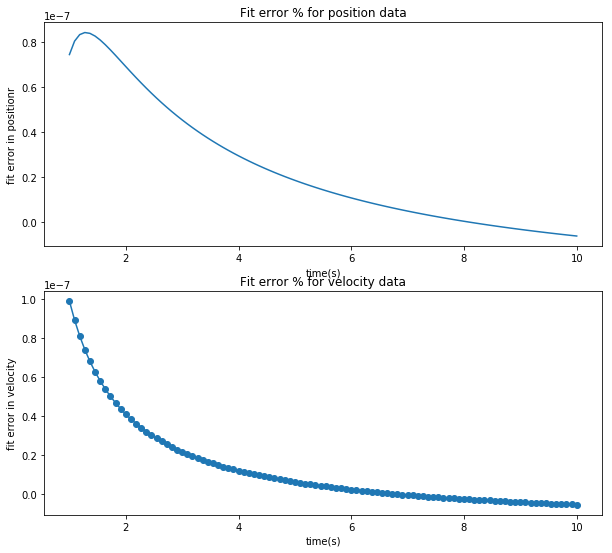

In [39]:
plt.figure(figsize=(10, 14)) #ADDED: makes graph more readable and made into subplots

plt.subplot(3, 1, 1) 
plt.plot(t,((xfit-x)/x)*100)
plt.title("Fit error % for position data")
plt.xlabel("time(s)")
plt.ylabel("fit error in positionr")

plt.subplot(3, 1, 2) 
plt.plot(t,((vfit-v)/v)*100,"o-")
plt.title("Fit error % for velocity data")
plt.xlabel("time(s)")
plt.ylabel("fit error in velocity")

The above graphs depicts the fit error for the " 1D projectile motion position data" graph. The error error is higher as it gets close to zero. 

## Post lab questions

Describe briefly Millikan's experiment in your own words.  Be sure to explain these two main points.

1.  What is $\nu$, and why is it the independent variable in the experiment?  Did Millikan use $\nu$ in the           visible, infrared, or ultraviolet spectrum?  Here is a [reference](http://hyperphysics.phy-astr.gsu.edu/hbase/ems3.html) for light energies.
    
2.  What does $V$ measure, and why is it the dependent variable in the experiment?  
-----------------------------------------------------------------------------------------------

1. $\nu$ is the frequency of the light that hit the material that caused the electron to be ejected off of the material. it is the indpendent variable because it is variable that millikan was able to control and manipulate, and it is the variable that caused the change of the dependent variable $V$ 
2. $V$ is measuring the amount of voltage required to stope the ejected electron from moving. by measuring how much energy it takes to stop the electron, we can determine the amount of energy the electron had when it was ejected from the material. 

## With any remaining time 

* Play with "tricking out" your plots using the matplotlib gallery - which is one of my favorite places on the interwebs. Click on the [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py) and use it as a guide to modify your scatter plot.  Once you're done with that, play with the markers as well - you can change their shape! [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-symbol-py)

* Work on HW6 - which includes finishing all of the exercises in Weekly Session 2